<a href="https://colab.research.google.com/github/carlosheadst/Machine-Learning-Models/blob/master/Clusteriza%C3%A7%C3%A3oDeFilmesComKMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

uri = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'

filmes = pd.read_csv(uri)
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [2]:
filmes.columns = ['filme_id', 'titulo', 'generos']
filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
generos = filmes.generos.str.get_dummies()
generos.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
dados_dos_filmes = pd.concat([filmes, generos], axis = 1)
dados_dos_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

generos_escalados = scaler.fit_transform(generos)
generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [6]:
generos.shape

(9742, 20)

# KMeans


In [7]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters = 3)

modelo.fit(generos_escalados)

print(f'Grupos {modelo.labels_}')

Grupos [0 0 2 ... 2 0 2]


In [8]:
print(generos.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-5.91799474e-02 -3.49284416e-02  8.90340616e-01  2.26615479e+00
   2.48300776e+00  2.26534845e-01 -3.17199118e-01 -2.02346627e-01
  -5.92475456e-01  8.72298715e-01 -9.49256298e-02 -2.78246863e-01
   2.45033879e-01  3.81893769e-01 -1.34152701e-01 -2.75538591e-01
   1.29051354e-01 -4.70069489e-01 -1.69617002e-01 -8.36120356e-02]
 [-5.91799474e-02  6.02715444e-01  1.42139695e-01 -2.32856375e-01
  -2.67690893e-01 -5.69162831e-01  4.82959980e-01 -2.15814511e-01
  -1.76267523e-01  1.36240765e-04  2.15640290e-01  6.60165557e-01
   1.38706721e-01 -1.76949578e-01  4.27089691e-01 -3.45837138e-01
   4.48425560e-01  1.12504307e+00 -1.44675365e-01 -6.77530594e-02]
 [ 3.83223437e-02 -2.87415046e-01 -2.12757749e-01 -2.524014

In [9]:
grupos = pd.DataFrame(modelo.cluster_centers_,
             columns=generos.columns)
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,-0.034928,0.890341,2.266155,2.483008,0.226535,-0.317199,-0.202347,-0.592475,0.872299,-0.094926,-0.278247,0.245034,0.381894,-0.134153,-0.275539,0.129051,-0.470069,-0.169617,-0.083612
1,-0.059180,0.602715,0.142140,-0.232856,-0.267691,-0.569163,0.482960,-0.215815,-0.176268,0.000136,0.215640,0.660166,0.138707,-0.176950,0.427090,-0.345837,0.448426,1.125043,-0.144675,-0.067753
2,0.038322,-0.287415,-0.212758,-0.252401,-0.270451,0.240188,-0.183647,0.137579,0.181294,-0.140802,-0.089533,-0.276091,-0.106975,0.024421,-0.186014,0.212607,-0.238853,-0.471174,0.097710,0.046433


In [10]:
grupos.transpose()

,0,1,2
(no genres listed),-0.059180,-0.059180,0.038322
Action,-0.034928,0.602715,-0.287415
Adventure,0.890341,0.142140,-0.212758
Animation,2.266155,-0.232856,-0.252401
Children,2.483008,-0.267691,-0.270451
Comedy,0.226535,-0.569163,0.240188
Crime,-0.317199,0.482960,-0.183647
Documentary,-0.202347,-0.215815,0.137579
Drama,-0.592475,-0.176268,0.181294
Fantasy,0.872299,0.000136,-0.140802


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f83ee7d9c50>,
      dtype=object)

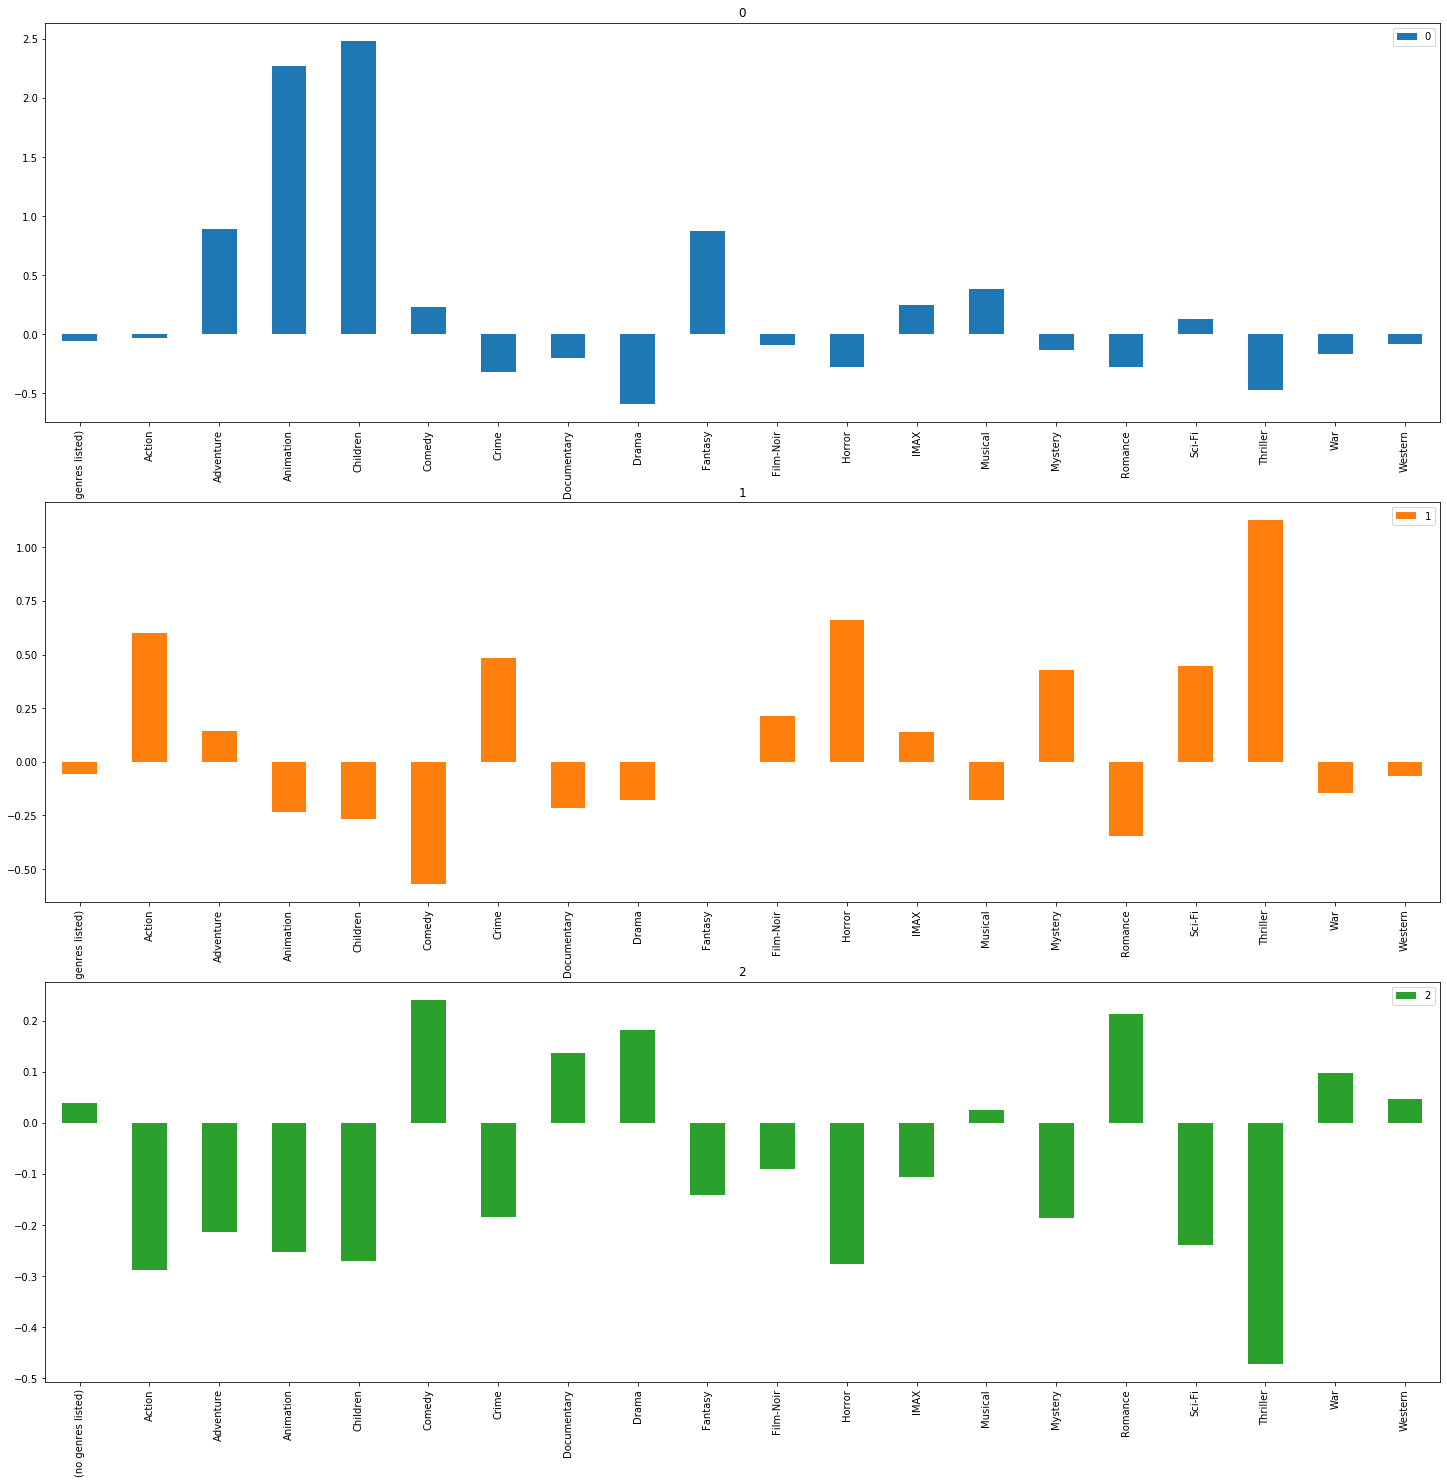

In [11]:
grupos.transpose().plot.bar(subplots = True,
                figsize=(25, 25),
                sharex = False)

In [12]:
grupo = 2

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
2612,3497,Max Dugan Returns (1983),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
282,324,"Sum of Us, The (1994)",Comedy|Drama,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4856,7259,You Got Served (2004),Drama|Musical,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4977,7619,"Miracle Worker, The (1962)",Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4499,6660,"Red Shoes, The (1948)",Drama|Fantasy|Musical|Romance,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0
9101,144222,Bros Before Hos (2013),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
346,389,"Colonel Chabert, Le (1994)",Drama|Romance|War,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
2203,2928,"Razor's Edge, The (1984)",Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4950,7460,Coffee and Cigarettes (2003),Comedy|Drama,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5304,8796,"Funny Thing Happened on the Way to the Forum, ...",Comedy|Musical,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


# Exemplo de Como plotar dados e centroides

O KMeans utiliza o conceito de centroids e para visualizar eles em um gráfico podemos pedir para a biblioteca sklearn gerar alguns dados aleatórios para testar o plot disso.

A função 'make_blobs' do módulo 'datasets' do sklearn gera alguns dados para nós em formas de "bolhas", isso é, os dados são gerados em forma de grupos.

para isso informamos o número de exemplos no parâmetro n_samples e o número de dimensões que no caso queremos em 2D então o parâmentro n_features deve ser igual a 2, e setamos um parâmetro de aleatoriedade igual a 7 no parâmetro random_state para mantermos os dados iguais a cada plot.

Como o make_blobs nos retorna um par de dados (x,y) e não queremos o y, usamos o underscore (_) para ignorar o retorno dessa variável.

In [13]:
from sklearn.datasets import make_blobs

dados, _ = make_blobs(n_samples=1000, n_features=2, random_state=7)
dados = pd.DataFrame(dados, columns=['coluna1','coluna2'])
dados.head()

,coluna1,coluna2
0,9.829632,0.763094
1,-9.723548,4.100788
2,10.403457,1.761671
3,-2.253417,4.660486
4,13.059859,-0.004112


Trasformando os dados em um DataFrame do pandas conseguimos plotar a distribuição deles usando a biblioteca matplotlib cruzando os dados das colunas. 

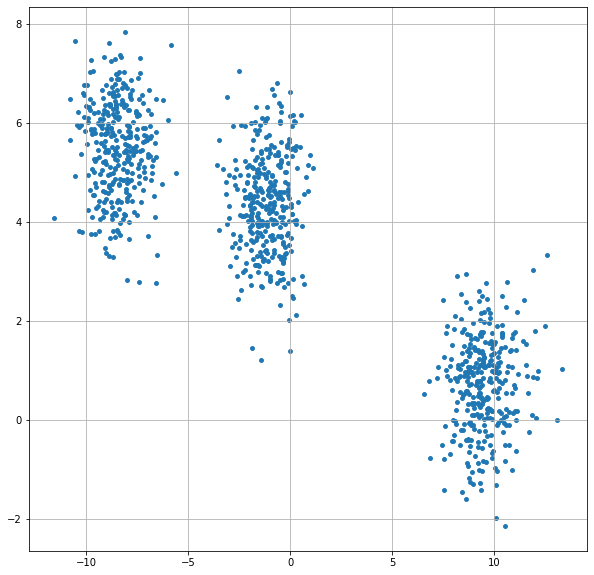

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.grid()
plt.scatter(x=dados.coluna1, y=dados.coluna2,
            s=15)

Pedimos ao KMeans para criar um modelo com 3 grupos e segmentar os nossos dados baseado no modelo criado.


In [0]:
modelo_exemplo = KMeans(n_clusters=3)
grupos = modelo_exemplo.fit_predict(dados)

Plotamos os dados segmentados identificando os grupos com cores distintas (c=grupos) e vívidas (cmap='viridis').

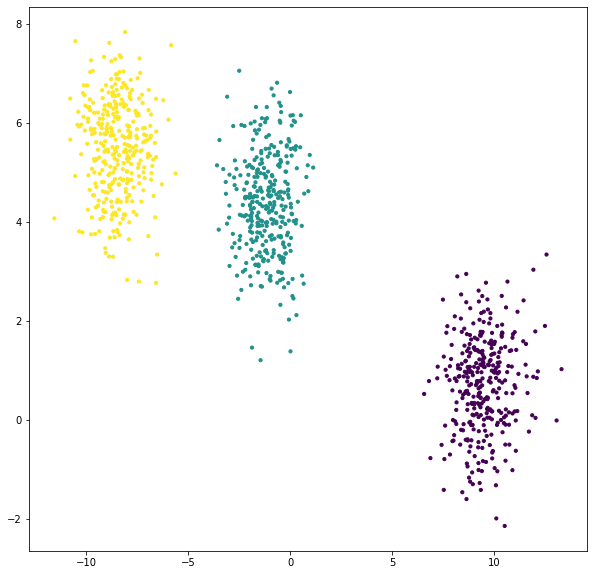

In [16]:
plt.figure(figsize=(10,10))
plt.scatter(x=dados.coluna1, y=dados.coluna2,
            s=10,
            c=grupos,
            cmap='viridis')

In [17]:
modelo_exemplo.cluster_centers_

array([[ 9.47504357,  0.73192771],
       [-1.14205634,  4.38074515],
       [-8.47609233,  5.49754192]])

Geramos pontos centrais para os grupos, chamados centroides, e plotamos novamente nossos grupos.

O pandas nos devolve os centroides em forma de matriz, então montamos a localização cartesiana pegando a posição 0 para o eixo x (centroides[:,0]) e a posição 1 para o eixo y (centroides[:,1]) . Também podemos estilizar a representação do nosso centroide, marcando como um X (marker='x'), setando o tamanho (s=170), a largura da linha (linewidths=0), cor (color=b) e a hierarquia de aparição (zorder=8).

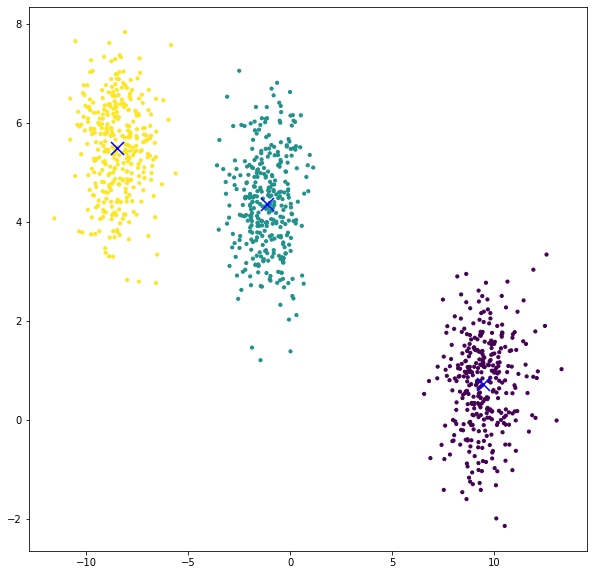

In [18]:
centroides = modelo_exemplo.cluster_centers_
plt.figure(figsize=(10,10))
plt.scatter(x=dados.coluna1, y=dados.coluna2,
            s=10,
            c=grupos,
            cmap='viridis')

plt.scatter(centroides[:,0], centroides[:,1],
            marker='x', s=170, linewidths=0,
            color='b', zorder=8)

# Voltando ao Dataset

Aqui temos um problema: nesses gráficos existiam duas dimensões (eixos X e Y), mas nossos dados possuem 20 dimensões diferentes - uma para cada gênero de filme.

Nós temos 20 dimensões no nosso dataframe, e vamos tentar reduzi-las até 2 dimensões.

Existem diversos algoritmos de redução de dimensionalidade e um deles é o TSNE, feito justamente para visualização de dados. Vamos importar ele do módulo manifold da biblioteca sklearn, que possui, além desse, outros algoritmos parecidos.

In [19]:
from sklearn.manifold import TSNE

tsne = TSNE()

visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[ 32.59602   , -50.730656  ],
       [-19.486223  ,  45.40386   ],
       [ 48.06159   , -27.939043  ],
       ...,
       [  3.0289545 ,   1.2807559 ],
       [ -3.0137708 , -36.508186  ],
       [-31.63642   ,   0.64095587]], dtype=float32)

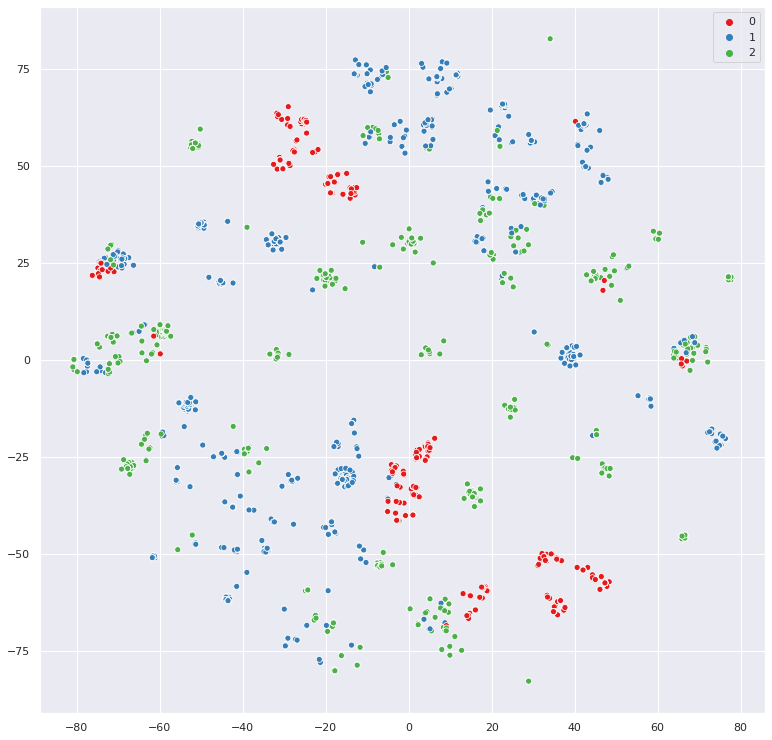

In [20]:
import seaborn as sns

sns.set(rc={
          'figure.figsize': (13,13)
        })

sns.scatterplot(x=visualizacao[:,0],
                y=visualizacao[:,1],
                hue=modelo.labels_,
                palette=sns.color_palette('Set1', 3)
                )

# Testando o modelo com 20 grupos


In [21]:
modelo_20_clusters = KMeans(n_clusters=20)

modelo_20_clusters.fit(generos_escalados)

grupos_20_clusters = pd.DataFrame(data=modelo_20_clusters.cluster_centers_,
             columns=generos.columns)

grupos_20_clusters.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.05918,0.404605,0.035718,-0.211943,-0.259210,-0.466192,-0.297025,-0.190207,0.751893,-0.253033,-0.094926,-0.305776,-0.128397,-0.188419,-0.213866,-0.052283,-0.240255,-0.197773,4.950012,-0.132065
1,-0.05918,0.253841,-0.299868,-0.258679,-0.270451,-0.613900,-0.374632,-0.217489,0.243388,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.364508,-0.334435,2.035586,-0.202020,-0.132065
2,-0.05918,-0.462136,-0.364480,-0.238850,-0.260913,-0.604451,-0.338046,4.597924,-0.808396,-0.285947,-0.094926,-0.318057,-0.128397,-0.188419,-0.229553,-0.429644,-0.334435,-0.479111,-0.078173,-0.132065
3,-0.05918,0.438123,0.509299,3.865793,-0.270451,-0.070056,-0.231259,-0.217489,-0.514066,0.680329,-0.094926,-0.189378,-0.128397,-0.188419,-0.095993,-0.256637,0.593068,-0.372241,-0.183353,-0.132065
4,-0.05918,-0.428689,-0.317559,-0.258679,-0.270451,1.262425,-0.300590,-0.217489,-0.071367,-0.090540,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,2.259206,-0.302986,-0.463942,-0.202020,-0.132065


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f83bff1ef98>,
      dtype=object)

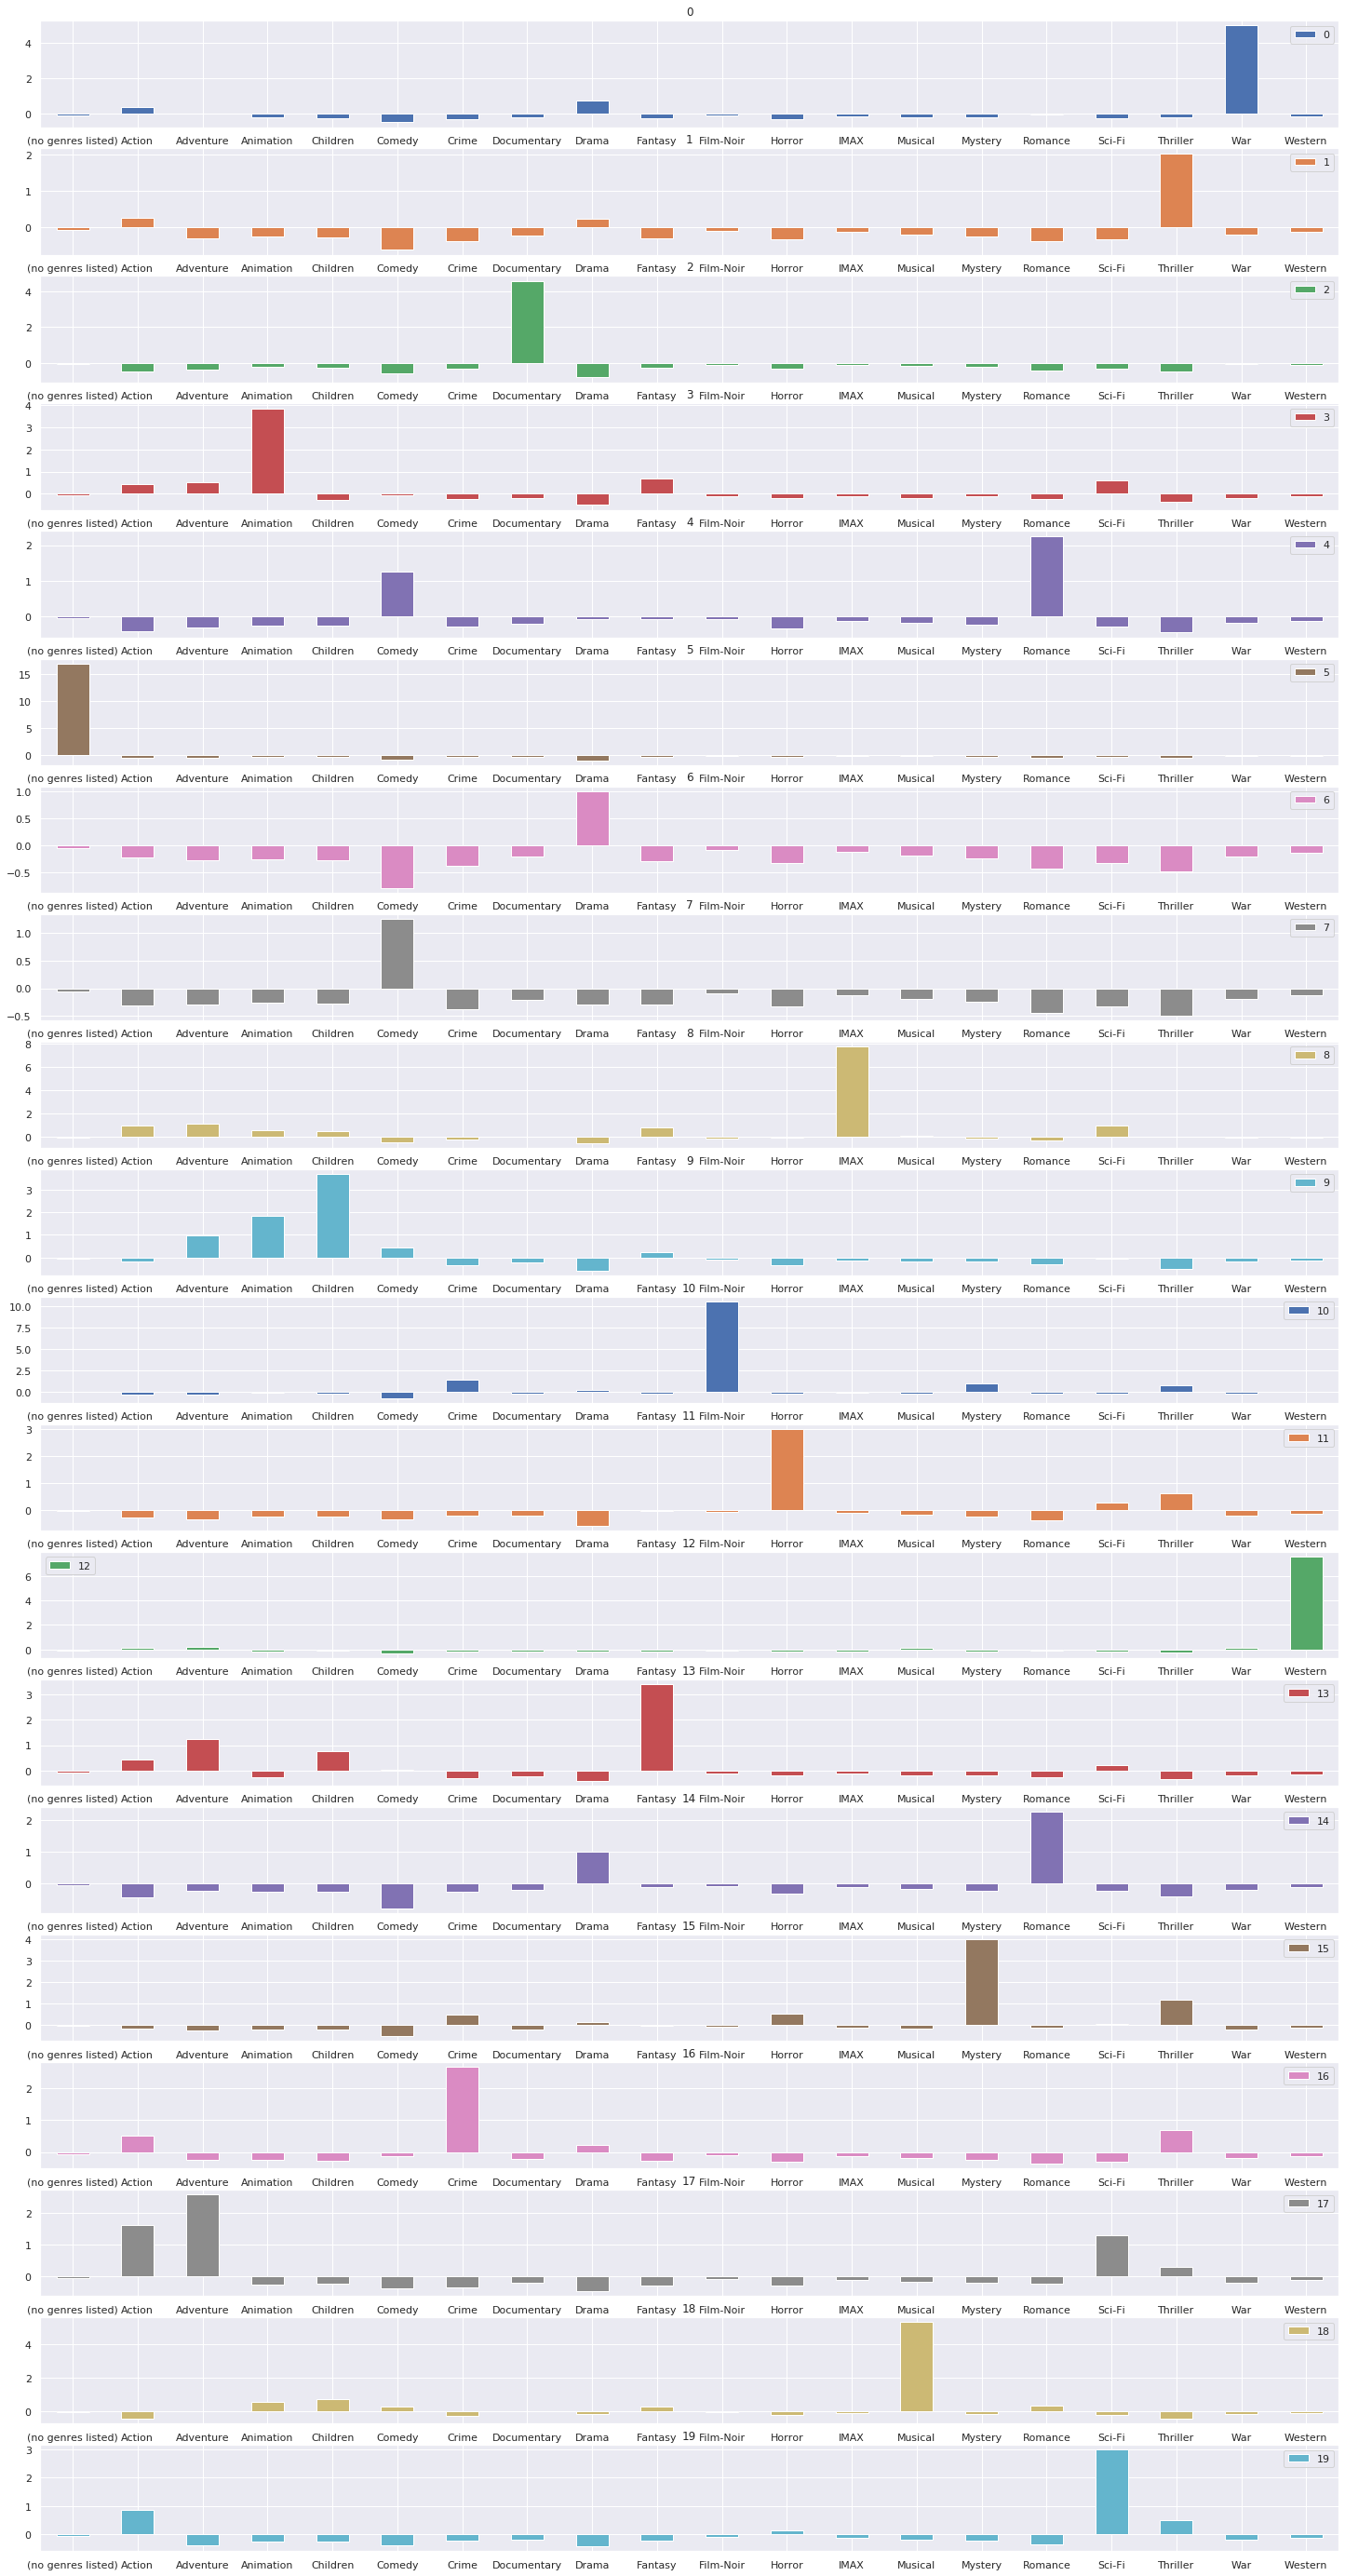

In [22]:
grupos_20_clusters.transpose().plot.bar(subplots = True,
                figsize=(25, 50),
                sharex = False,
                rot=0)

In [23]:
grupo_teste = 4

filtro = modelo_20_clusters.labels_ == grupo_teste

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
2482,3307,City Lights (1931),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
717,936,Ninotchka (1939),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4943,7450,Laws of Attraction (2004),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4374,6407,"Walk, Don't Run (1966)",Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1378,1888,Hope Floats (1998),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3317,4489,Coming to America (1988),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7033,68848,"Brothers Bloom, The (2008)",Adventure|Comedy|Crime|Romance,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1374,1883,Bulworth (1998),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
7520,84246,It Happened on Fifth Avenue (1947),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6352,49286,"Holiday, The (2006)",Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


# Quantos clusters utilizar?

Nesse momento nos deparamos com a pergunta de quantos clusters utilizar para treinar o modelo, para isso vamos treinar, utilizando o KMeans, varios resultados com diversos clusters claculando seu erro em cima dos centroides para utilizarmos o conceito do Elbow Method

In [0]:
def kmeans(numero_de_clusters, generos):
  modelo = KMeans(n_clusters=numero_de_clusters)
  modelo.fit(generos)
  return [numero_de_clusters, modelo.inertia_]

In [25]:
kmeans(20, generos_escalados)

[20, 55137.71526471263]

In [26]:
kmeans(3, generos_escalados)

[3, 166382.19759558106]

In [27]:
resultado = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1, 41)]
resultado

[[1, 194840.0],
 [2, 179543.69964282232],
 [3, 166545.03450948375],
 [4, 157056.37346443217],
 [5, 146394.58739071075],
 [6, 137872.71024036856],
 [7, 129225.53266499029],
 [8, 119040.26589967459],
 [9, 110886.75600085394],
 [10, 102297.59927418036],
 [11, 94581.68043350965],
 [12, 88394.27473665486],
 [13, 79720.3965397166],
 [14, 73363.29902617805],
 [15, 69336.20291912333],
 [16, 64677.63695472408],
 [17, 61370.95871996241],
 [18, 58510.93935860319],
 [19, 56995.302774404096],
 [20, 56073.76612477889],
 [21, 52390.82973893889],
 [22, 52016.46437668436],
 [23, 50750.16189210671],
 [24, 48681.1071813792],
 [25, 47911.20849127196],
 [26, 47332.04629009999],
 [27, 45624.24955358483],
 [28, 45677.7325145997],
 [29, 43016.80138349255],
 [30, 42944.08164629286],
 [31, 41383.16495257553],
 [32, 41320.85839205964],
 [33, 40718.28806516634],
 [34, 38294.800640683614],
 [35, 38887.78921818565],
 [36, 37966.21736148934],
 [37, 37057.215162580134],
 [38, 36237.44983302423],
 [39, 35913.808602510

In [28]:
resultado = pd.DataFrame(data=resultado,
             columns=['grupos','inertia'])

resultado

,grupos,inertia
0,1,194840.000000
1,2,179543.699643
2,3,166545.034509
3,4,157056.373464
4,5,146394.587391
5,6,137872.710240
6,7,129225.532665
7,8,119040.265900
8,9,110886.756001
9,10,102297.599274


## Elbow Method

O Elbow Method ou método do cotovelo, é uma maneira de saber quantos centroids utilizar para treinar o modelo, de acordo com a quebra no ponto que é mostrado no gráfico

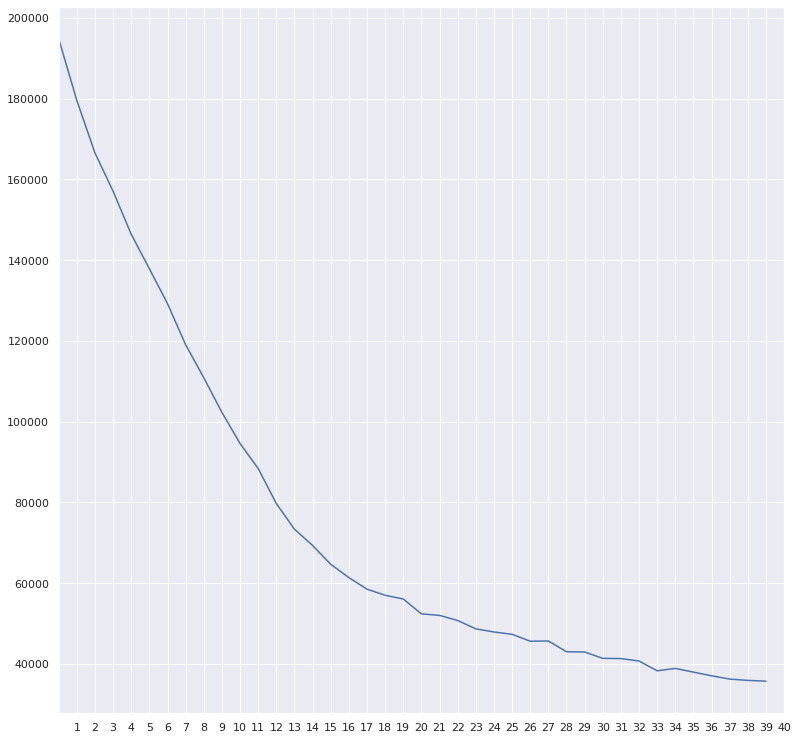

In [29]:
resultado.inertia.plot(xticks=resultado.grupos)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f83bf0f9630>,
      dtype=object)

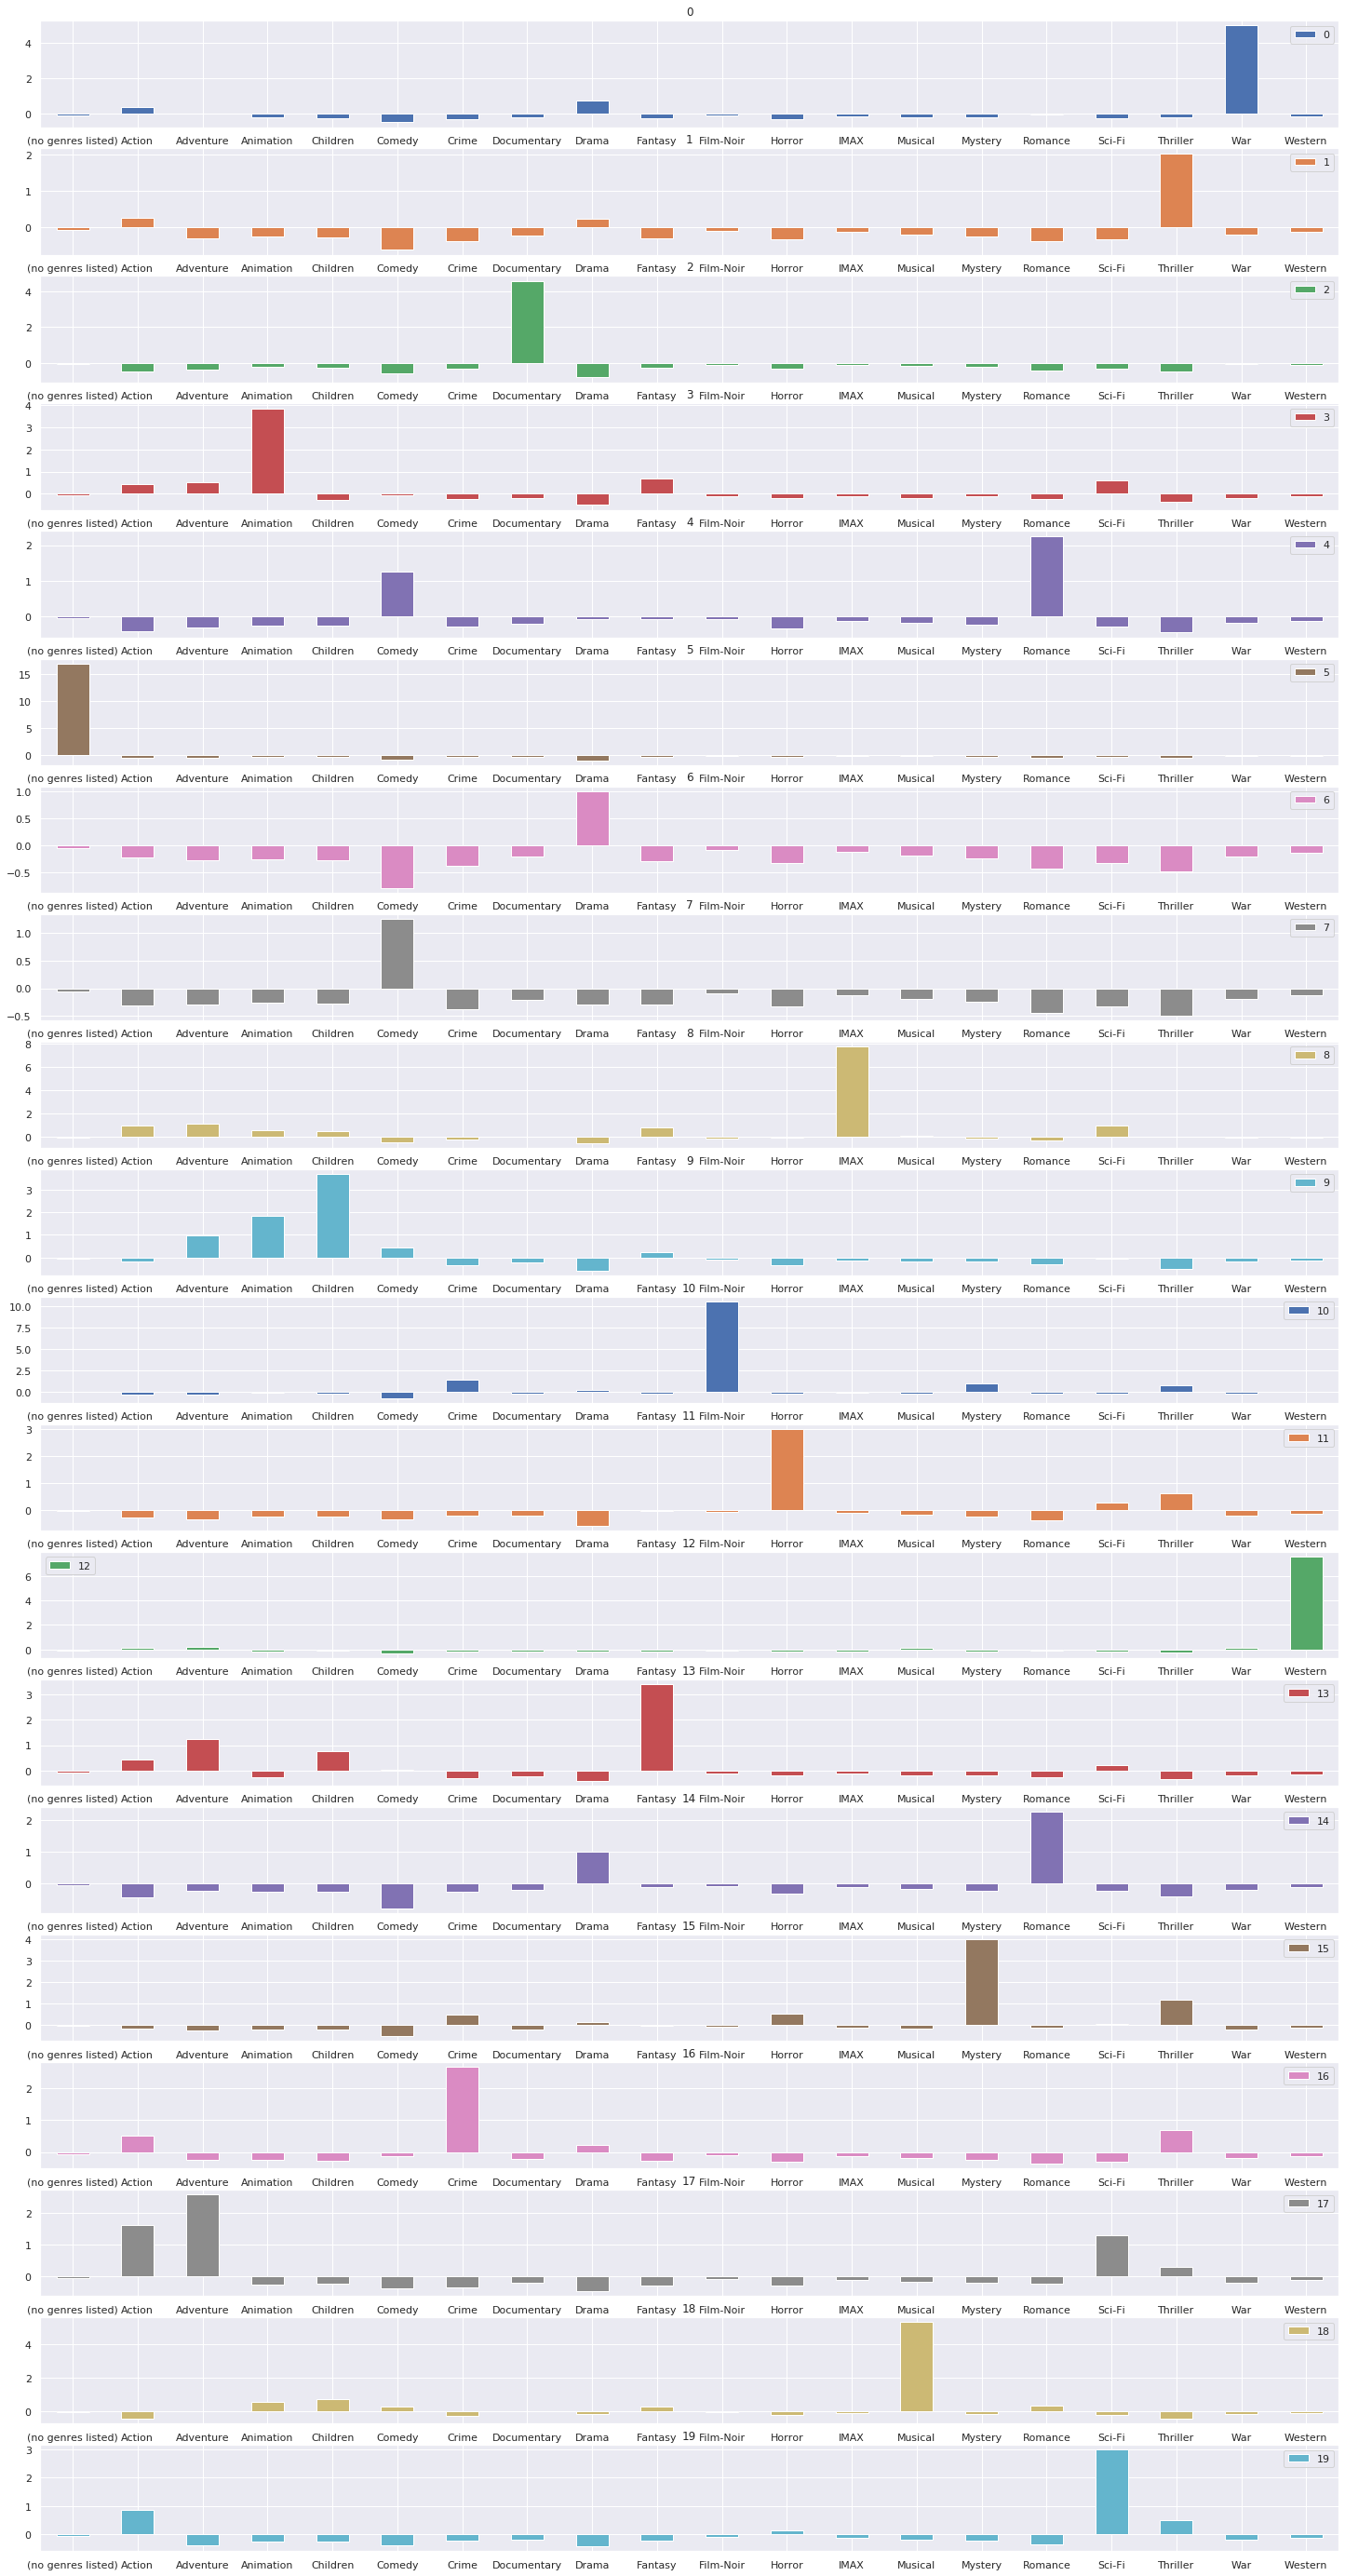

In [30]:
modelo = KMeans(n_clusters=16)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(data=modelo_20_clusters.cluster_centers_,
             columns=generos.columns)

grupos.transpose().plot.bar(subplots = True,
                figsize=(25, 50),
                sharex = False,
                rot=0)

In [31]:
grupo_teste = 12

filtro = modelo.labels_ == grupo_teste

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
2259,2997,Being John Malkovich (1999),Comedy|Drama|Fantasy,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0
2902,3889,Highlander: Endgame (Highlander IV) (2000),Action|Adventure|Fantasy,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7067,69606,Ghosts of Girlfriends Past (2009),Comedy|Fantasy|Romance,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
960,1261,Evil Dead II (Dead by Dawn) (1987),Action|Comedy|Fantasy|Horror,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0
9469,168366,Beauty and the Beast (2017),Fantasy|Romance,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
8597,117646,Dragonheart 2: A New Beginning (2000),Action|Adventure|Comedy|Drama|Fantasy|Thriller,0,1,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0
6892,63312,Krabat (2008),Drama|Fantasy,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
8355,108795,Wonder Woman (2009),Action|Adventure|Animation|Fantasy,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6256,46976,Stranger than Fiction (2006),Comedy|Drama|Fantasy|Romance,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0
4067,5797,"Company of Wolves, The (1984)",Fantasy|Horror,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


# Agrupamento Hierárquico


In [32]:
from sklearn.cluster import AgglomerativeClustering

modelo = AgglomerativeClustering(n_clusters=16)
grupos = modelo.fit_predict(generos_escalados)
grupos

array([ 5, 14, 13, ...,  0,  5,  0])

In [33]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[ 54.768665 ,  19.6742   ],
       [ 67.671745 , -23.740992 ],
       [-23.553219 ,  32.04316  ],
       ...,
       [ 16.344234 ,  -7.260383 ],
       [ 44.77791  , -15.749546 ],
       [-25.86777  ,   7.0716867]], dtype=float32)

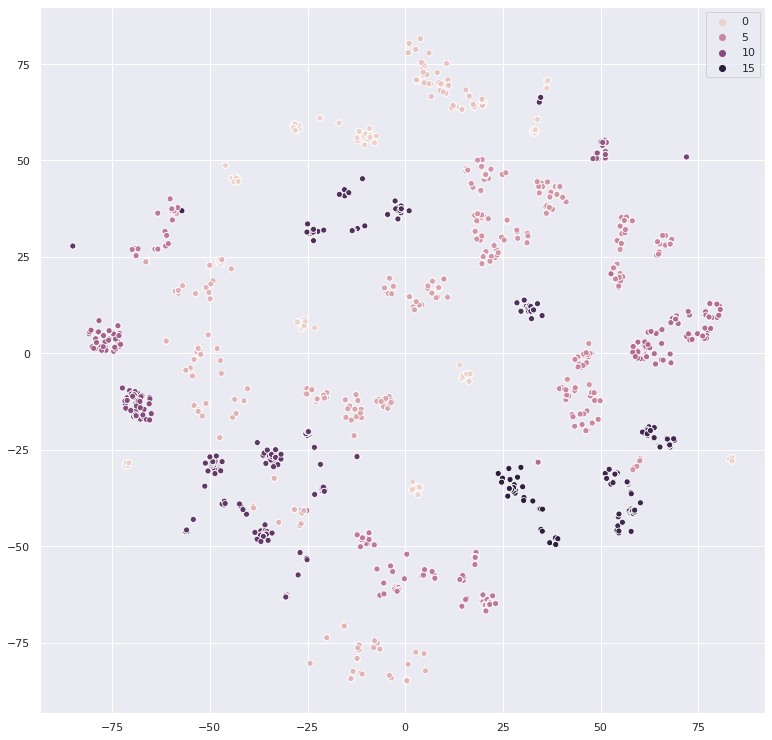

In [39]:
sns.scatterplot(x=visualizacao[:,0],
                y=visualizacao[:,1],
                hue=grupos)

## Dendrograma

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f83be270b70>,
      dtype=object)

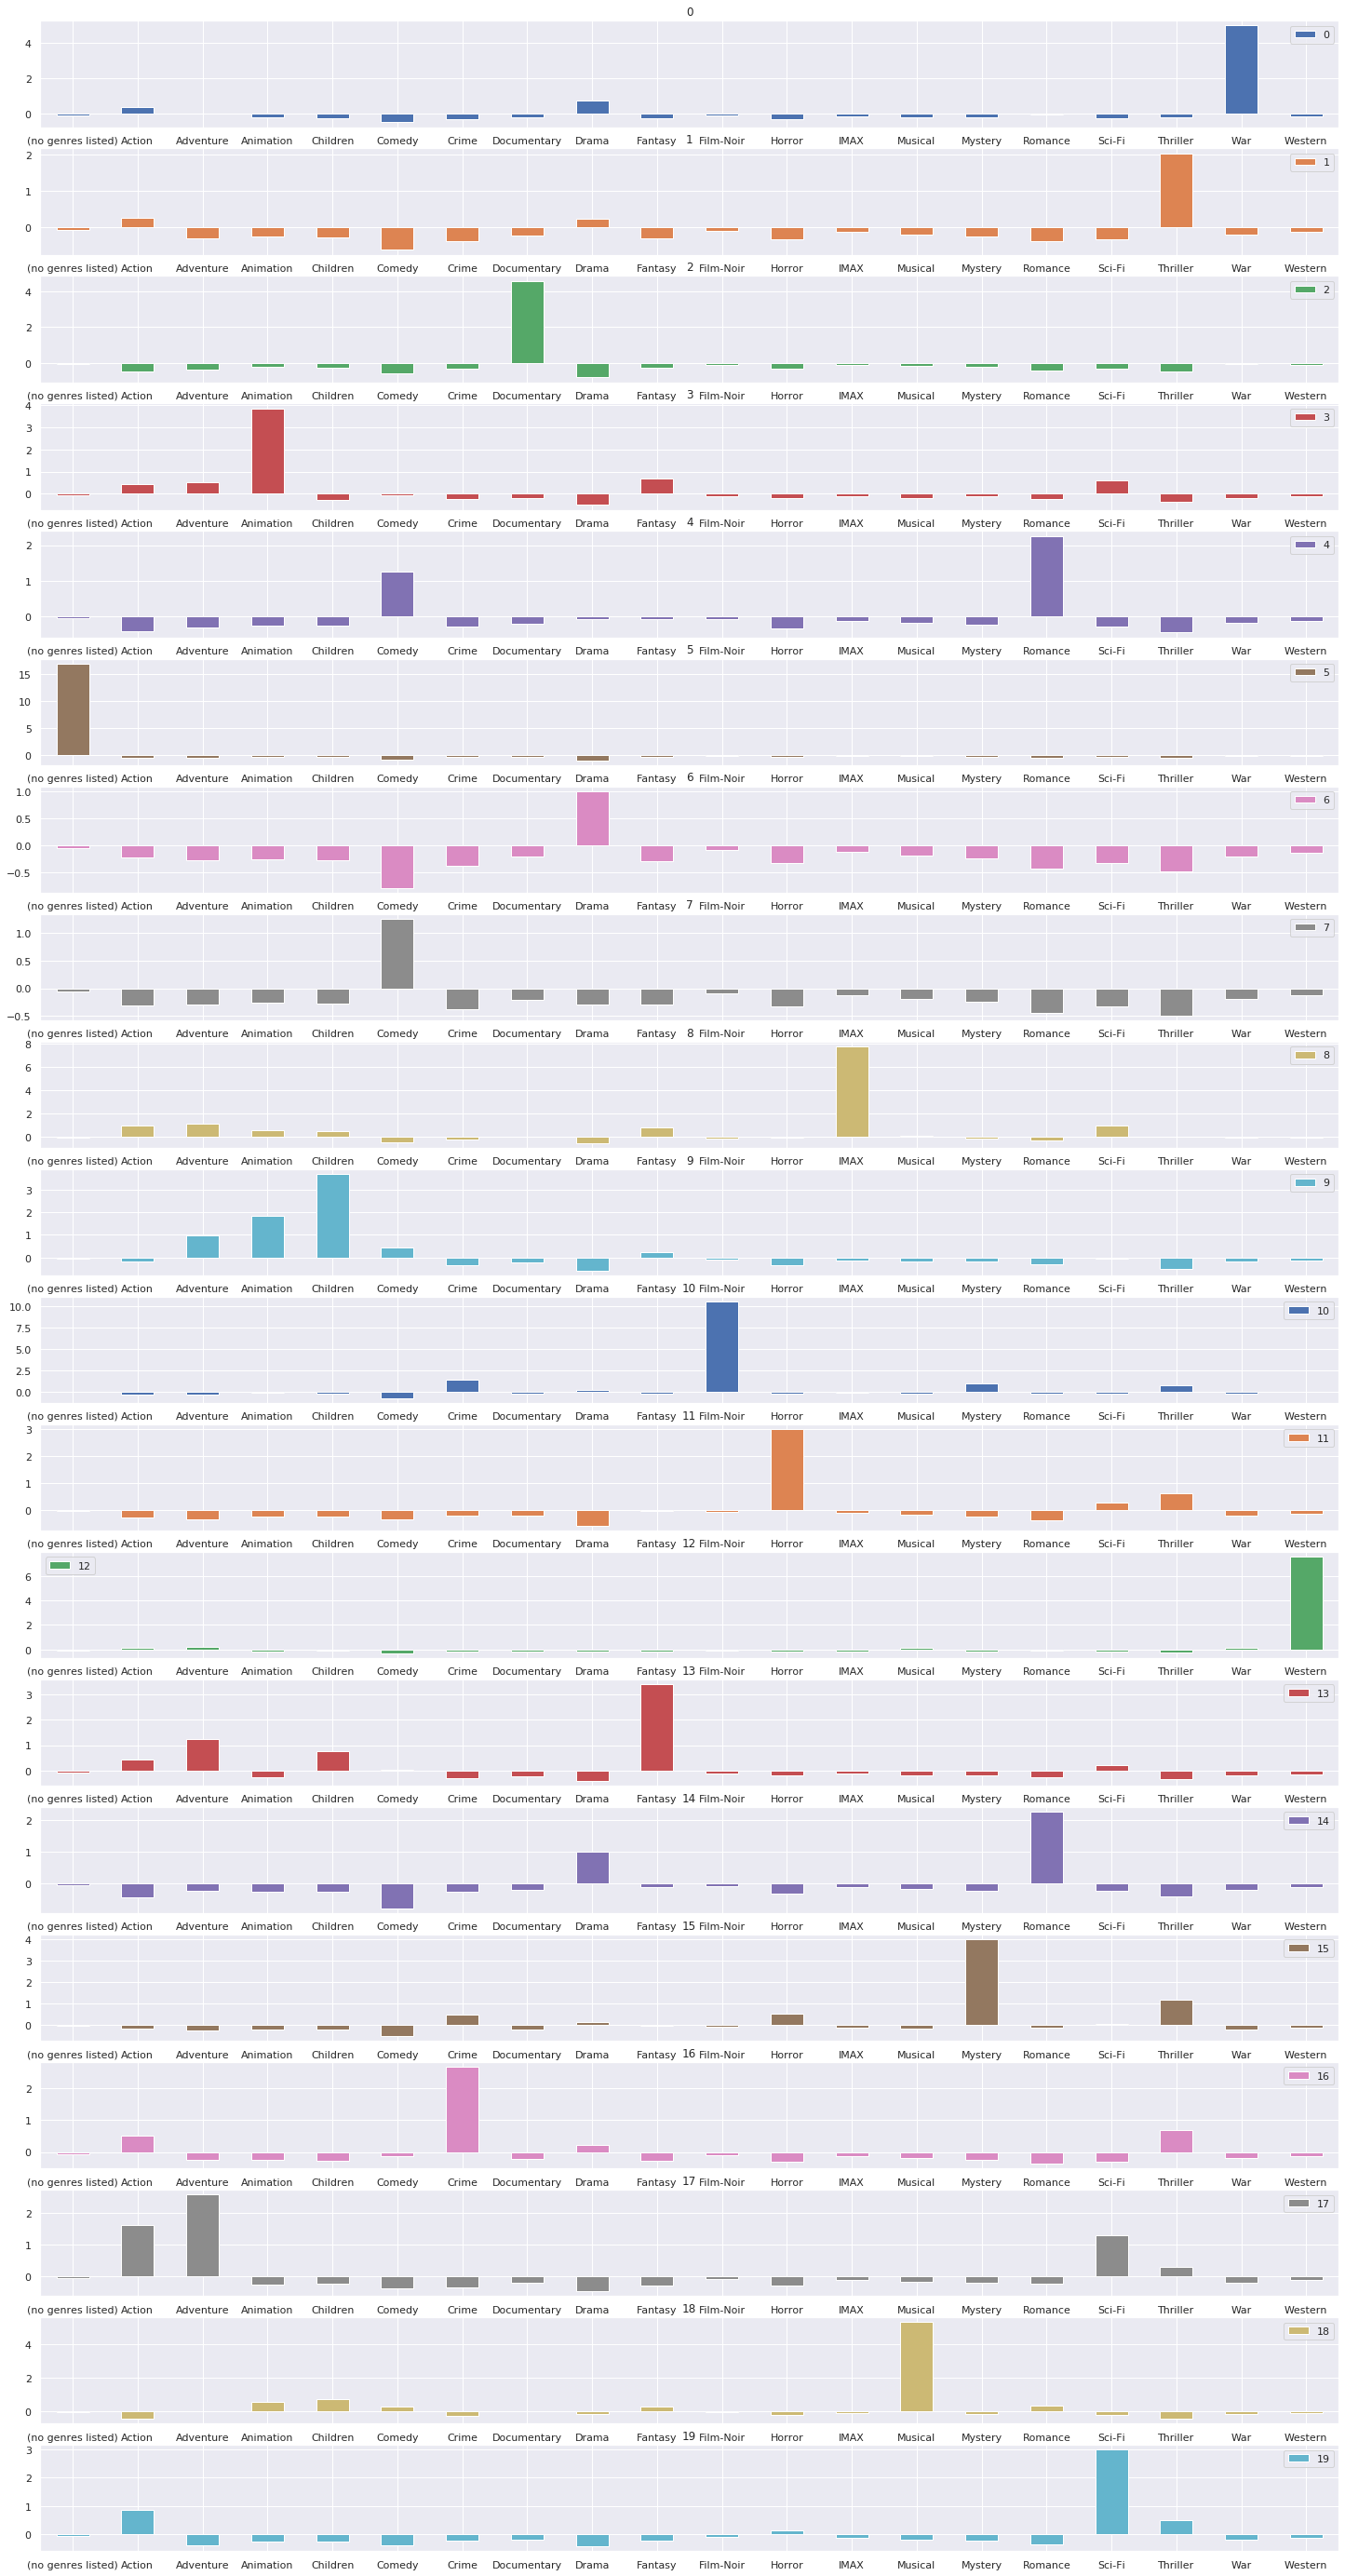

In [40]:
from scipy.cluster.hierarchy import dendrogram, linkage

modelo = KMeans(n_clusters=16)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(data=modelo_20_clusters.cluster_centers_,
             columns=generos.columns)

grupos.transpose().plot.bar(subplots = True,
                figsize=(25, 50),
                sharex = False,
                rot=0)

In [42]:
matriz_de_distancia = linkage(grupos)
matriz_de_distancia

array([[ 4.        , 14.        ,  2.31279973,  2.        ],
       [ 6.        ,  7.        ,  2.43846483,  2.        ],
       [ 1.        , 21.        ,  2.69093191,  3.        ],
       [20.        , 22.        ,  2.7208713 ,  5.        ],
       [16.        , 23.        ,  3.37191144,  6.        ],
       [17.        , 19.        ,  3.54400154,  2.        ],
       [24.        , 25.        ,  3.81605622,  8.        ],
       [11.        , 26.        ,  3.8203288 ,  9.        ],
       [13.        , 27.        ,  4.4101145 , 10.        ],
       [15.        , 28.        ,  4.55410033, 11.        ],
       [ 3.        ,  9.        ,  4.61450718,  2.        ],
       [29.        , 30.        ,  4.68603734, 13.        ],
       [ 2.        , 31.        ,  5.1591736 , 14.        ],
       [ 0.        , 32.        ,  5.24169017, 15.        ],
       [18.        , 33.        ,  5.82714406, 16.        ],
       [12.        , 34.        ,  7.87083408, 17.        ],
       [ 8.        , 35.

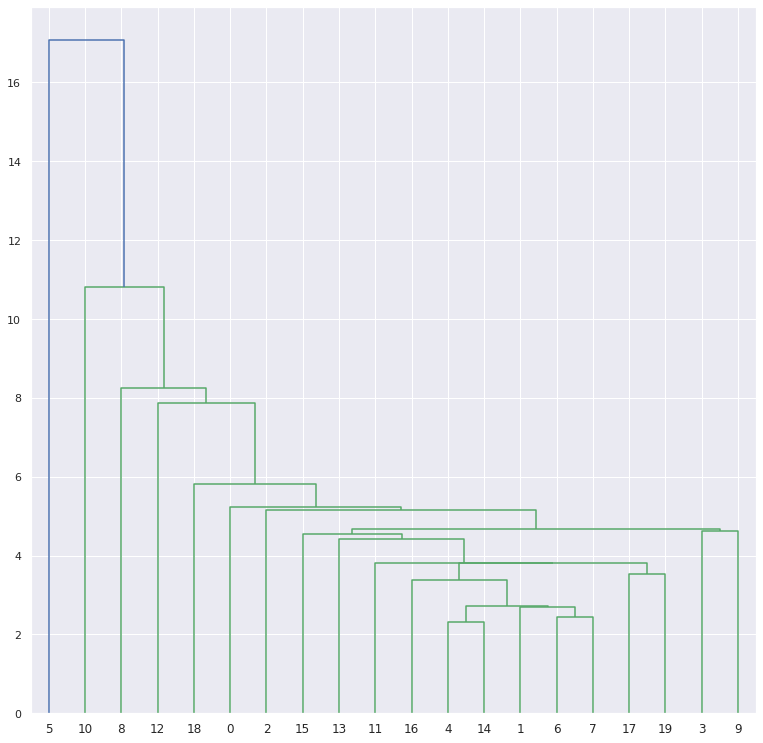

In [44]:
dendrograma = dendrogram(matriz_de_distancia)

# Exemplo de agrupamento com o DBSCAN

Quando não temos definido o número de clusters, podemos utilizar o agrupamento por densidade, o DBSCAN faz isso.

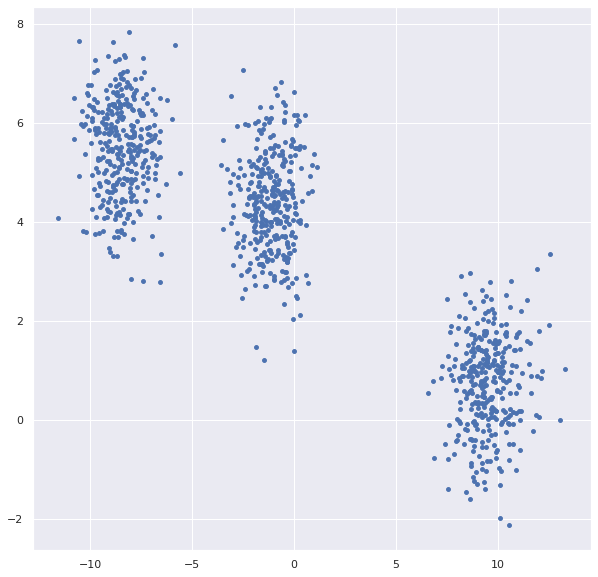

In [47]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

dados, _ = make_blobs(n_samples=1000, n_features=2, random_state=7)
dados = pd.DataFrame(dados, columns=['coluna1','coluna2'])

plt.figure(figsize=(10,10))
plt.scatter(x=dados.coluna1, y=dados.coluna2,
            s=15)

Podemos ver que ele conseguirá agrupar em três grupos distintos, conterão pontos que não estão nas cores de seus grupos, eles são chamados de outliers, são os pontos que o DBSCAN achou que não pertenciam aos grupos que estavam próximos.

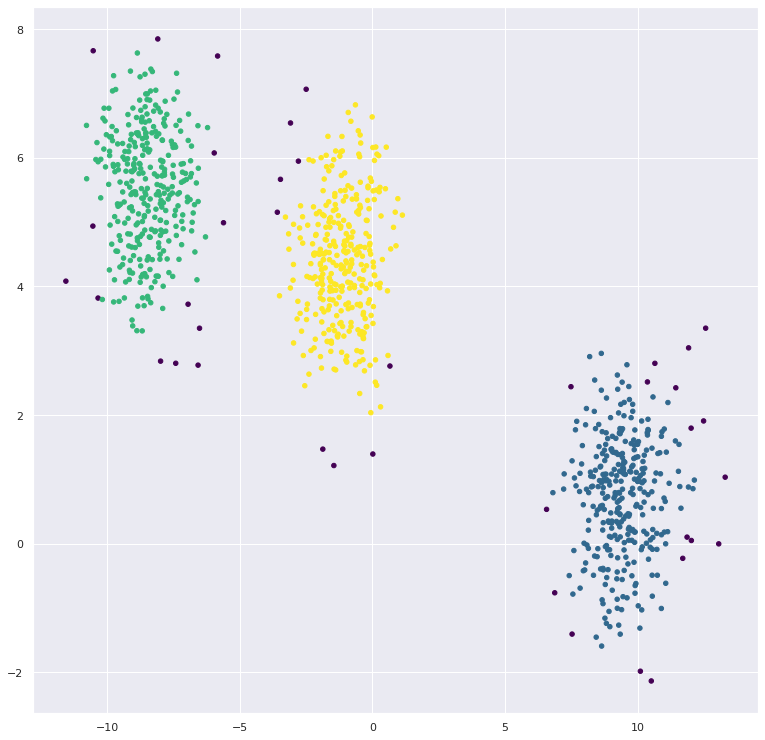

In [51]:
from sklearn.cluster import DBSCAN

modelo = DBSCAN()
grupos = modelo.fit_predict(dados)

plt.scatter(x=dados.coluna1, y=dados.coluna2,
            s=20,
            c=grupos,
            cmap='viridis')